In [1]:
import porespy as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

## Ordered Sphere Pack

In [143]:
dx, dy, dz = 20, 20, 20
r1 = 0.4
r2 = 1.5
throat = 0.4

In [162]:
xi, yi, zi = r1, r1, r1

dr = r1 + throat + r2

dl = dr/np.sqrt(2)

di2 = dl + r1

xs = [xi+i*2*dl for i in range(int(dx//(2*dl))+1)]

ys = [yi+i*2*dl for i in range(int(dy//(2*dl))+1)]

zs = [zi+i*2*dl for i in range(int(dz//(2*dl))+1)]

data = list(product(xs,ys,zs, [r1]))

In [163]:
xi2, yi2, zi2 = di2, di2, di2

xs2 = [xi2+i*2*dl for i in range(int(dx//(2*dl)))]

ys2 = [yi2+i*2*dl for i in range(int(dy//(2*dl)))]

zs2 = [zi2+i*2*dl for i in range(int(dz//(2*dl)))]

data2 = list(product(xs2,ys2,zs2, [r2]))

In [164]:
all_data = data + data2

In [171]:
df = pd.DataFrame(np.copy(all_data), columns=['X', 'Y', 'Z', 'R'])
# df = pd.DataFrame(np.copy(data2), columns=['X', 'Y', 'Z', 'R'])
print(df)
scale_factor = 20
df['X'] *= scale_factor
df['Y'] *= scale_factor
df['Z'] *= scale_factor
df['R'] *= scale_factor
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

             X          Y          Z    R
0     0.400000   0.400000   0.400000  0.4
1     0.400000   0.400000   3.652691  0.4
2     0.400000   0.400000   6.905382  0.4
3     0.400000   0.400000  10.158074  0.4
4     0.400000   0.400000  13.410765  0.4
..         ...        ...        ...  ...
554  18.289802  18.289802   5.279037  1.5
555  18.289802  18.289802   8.531728  1.5
556  18.289802  18.289802  11.784419  1.5
557  18.289802  18.289802  15.037110  1.5
558  18.289802  18.289802  18.289802  1.5

[559 rows x 4 columns]


395.9452041362876

In [172]:
im = ps.generators.spheres_from_coords(df)

In [173]:
im.shape

(407, 407, 407)

In [174]:
1-np.count_nonzero(im)/im.size

0.6269771183534623

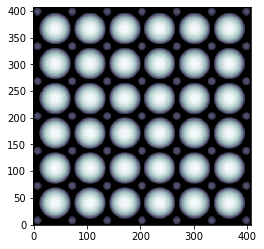

In [175]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(True);

In [176]:
np.save('ord_spherepack',im)

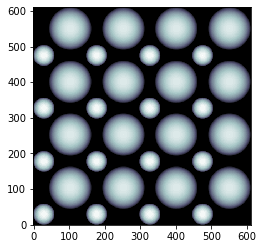

In [86]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(True);

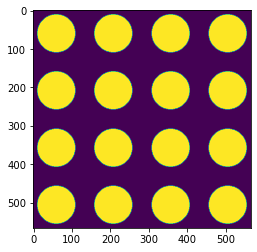

In [78]:
plt.imshow(im[np.random.randint(0,100)])

In [99]:
throat2 = 0.04
r2 = dr*np.sqrt(2)/2 - r - throat2
xi, yi, zi = 2*r+throat/2, 2*r+throat/2, 2*r+throat/2

dr = 2*r + throat

xs = [xi+i*dr for i in range(int(dx//(dr)-1))]

ys = [yi+i*dr for i in range(int(dy//(dr)-1))]

zs = [zi+i*dr for i in range(int(dz//(dr)-1))]

data = list(product(xs,ys,zs, [r2]))

In [100]:
df2 = pd.DataFrame(np.copy(data), columns=['X', 'Y', 'Z', 'R'])
print(df2)

df2['X'] *= 30
df2['Y'] *= 30
df2['Z'] *= 30
df2['R'] *= 30
(df2['X'].max()*df2['Y'].max()*df2['Z'].max())**0.333

       X     Y     Z         R
0   2.05  2.05  2.05  0.444924
1   2.05  2.05  4.15  0.444924
2   2.05  2.05  6.25  0.444924
3   2.05  4.15  2.05  0.444924
4   2.05  4.15  4.15  0.444924
5   2.05  4.15  6.25  0.444924
6   2.05  6.25  2.05  0.444924
7   2.05  6.25  4.15  0.444924
8   2.05  6.25  6.25  0.444924
9   4.15  2.05  2.05  0.444924
10  4.15  2.05  4.15  0.444924
11  4.15  2.05  6.25  0.444924
12  4.15  4.15  2.05  0.444924
13  4.15  4.15  4.15  0.444924
14  4.15  4.15  6.25  0.444924
15  4.15  6.25  2.05  0.444924
16  4.15  6.25  4.15  0.444924
17  4.15  6.25  6.25  0.444924
18  6.25  2.05  2.05  0.444924
19  6.25  2.05  4.15  0.444924
20  6.25  2.05  6.25  0.444924
21  6.25  4.15  2.05  0.444924
22  6.25  4.15  4.15  0.444924
23  6.25  4.15  6.25  0.444924
24  6.25  6.25  2.05  0.444924
25  6.25  6.25  4.15  0.444924
26  6.25  6.25  6.25  0.444924


186.5212300334987

In [101]:
dfAll = pd.concat([df, df2])

In [106]:
im = ps.generators.spheres_from_coords(dfAll)
im.shape

(250, 250, 250)

In [103]:
1-np.count_nonzero(im)/im.size

0.520972736

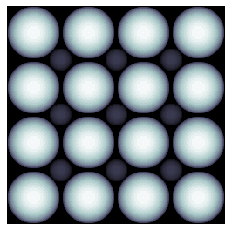

In [104]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

In [105]:
np.save('sphere_pack',im)

## Ordered Sphere Pack, Add Noise

In [221]:
dx, dy, dz = 20, 20, 20
r1 = 0.4
r2 = 1.5
throat = 0.4

In [222]:
xi, yi, zi = r1, r1, r1

dr = r1 + throat + r2

dl = dr/np.sqrt(2)

di2 = dl + r1

xs = [xi+i*2*dl for i in range(int(dx//(2*dl))+1)]

ys = [yi+i*2*dl for i in range(int(dy//(2*dl))+1)]

zs = [zi+i*2*dl for i in range(int(dz//(2*dl))+1)]

data = list(product(xs,ys,zs, [r1]))

In [320]:
xi2, yi2, zi2 = di2, di2, di2

xs2 = [xi2+i*2*dl for i in range(int(dx//(2*dl)))]

ys2 = [yi2+i*2*dl for i in range(int(dy//(2*dl)))]

zs2 = [zi2+i*2*dl for i in range(int(dz//(2*dl)))]

data2 = list(product(xs2,ys2,zs2, [r2]))

In [321]:
all_data = np.array(data + data2)

all_data[:,:3] += abs(np.random.normal(size=(all_data[:,:3].shape))*throat)

In [322]:
df = pd.DataFrame(np.copy(all_data), columns=['X', 'Y', 'Z', 'R'])
# df = pd.DataFrame(np.copy(data2), columns=['X', 'Y', 'Z', 'R'])
print(df)
scale_factor = 20
df['X'] *= scale_factor
df['Y'] *= scale_factor
df['Z'] *= scale_factor
df['R'] *= scale_factor
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

             X          Y          Z    R
0     0.462879   1.040498   0.577348  0.4
1     0.826109   0.468920   4.023625  0.4
2     0.597597   0.448207   7.154335  0.4
3     0.692503   0.443798  10.196883  0.4
4     0.575161   0.515452  13.694040  0.4
..         ...        ...        ...  ...
554  18.628273  18.720045   5.913957  1.5
555  18.403122  18.644897   8.534375  1.5
556  18.352236  18.361542  11.840572  1.5
557  18.582969  18.592986  15.869466  1.5
558  18.305018  18.414042  18.356674  1.5

[559 rows x 4 columns]


419.14731678012663

In [323]:
im = ps.generators.spheres_from_coords(df)

In [324]:
im.shape

(435, 425, 431)

In [325]:
1-np.count_nonzero(im)/im.size

0.6859668459751289

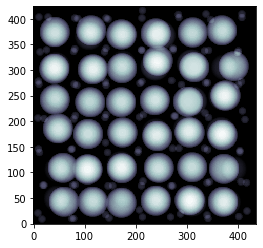

In [326]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(True);

In [275]:
np.save('ord_spherepack_noised',im)

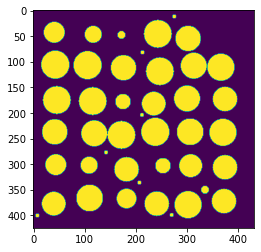

In [329]:
plt.imshow(im[np.random.randint(0,100)])